In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [24]:
all_data = pd.concat([train_data.assign(data="train"),test_data.assign(data="test")], axis=0)
all_data['Group'], all_data['CabinDeck'], all_data['CabinSide'] = all_data['PassengerId'].str[:4].astype(float), all_data['Cabin'].str[0], all_data['Cabin'].str[-1]
df = all_data.groupby('Group')['Group'].count()
dict = pd.Series(df.values, index=df.index).to_dict()
all_data['FamilyNum'] = all_data['Group'].map(dict)

In [5]:
def my_analysis(dataset):
    df = pd.DataFrame()
    length = len(dataset.index)
    for col in dataset.columns:
        row_df = pd.DataFrame({'Datatype':dataset[col].dtype,
                                'NA values %':round(dataset[col].isna().sum()*100/length,2),
                                'Unique values':dataset[col].nunique(),
                                'frequent value':dataset[col].value_counts().index[0],
                                'contribution %':round(dataset[col].value_counts().iloc[0]*100/length,2),
                                'min value':'none' if dataset[col].dtype=='object' else dataset[col].min(),
                                'max value':'none' if dataset[col].dtype=='object' else dataset[col].max()
                                },
                                index=[col])
        df = pd.concat([df,row_df])
    return df

In [ ]:
billing_data = all_data[['Age','HomePlanet','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].copy()

bin_edges = [0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0]
bin_names = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
billing_data['AgeGroup'] = pd.cut(billing_data['Age'], bin_edges, labels=bin_names)

plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.histplot(billing_data['Age'], kde=True)
plt.subplot(2,3,2)
sns.barplot(x='AgeGroup',y='RoomService', data=billing_data)
plt.subplot(2,3,3)
sns.barplot(x='AgeGroup',y='FoodCourt', data=billing_data)
plt.subplot(2,3,4)
sns.barplot(x='AgeGroup',y='ShoppingMall', data=billing_data)
plt.subplot(2,3,5)
sns.barplot(x='AgeGroup',y='Spa', data=billing_data)
plt.subplot(2,3,6)
sns.barplot(x='AgeGroup',y='VRDeck', data=billing_data)

In [ ]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2,3,1)
ax1.set_title('Number of VIPs')
pd.crosstab(all_data['HomePlanet'],all_data['VIP']).plot(kind='bar', ax=ax1, rot=0)
ax2 = plt.subplot(2,3,2)
ax2.set_title('RoomService')
sns.barplot(x="HomePlanet", y="RoomService", hue="VIP", data=all_data)
ax3 = plt.subplot(2,3,3)
ax3.set_title('FoodCourt')
sns.barplot(x="HomePlanet", y="FoodCourt", hue="VIP", data=all_data)
ax4 = plt.subplot(2,3,4)
ax4.set_title('ShoppingMall')
sns.barplot(x="HomePlanet", y="ShoppingMall", hue="VIP", data=all_data)
ax5 = plt.subplot(2,3,5)
ax5.set_title('Spa')
sns.barplot(x="HomePlanet", y="Spa", hue="VIP", data=all_data)
ax6 = plt.subplot(2,3,6)
ax6.set_title('VRDeck')
sns.barplot(x="HomePlanet", y="VRDeck", hue="VIP", data=all_data)
plt.tight_layout()

<AxesSubplot: xlabel='Destination'>

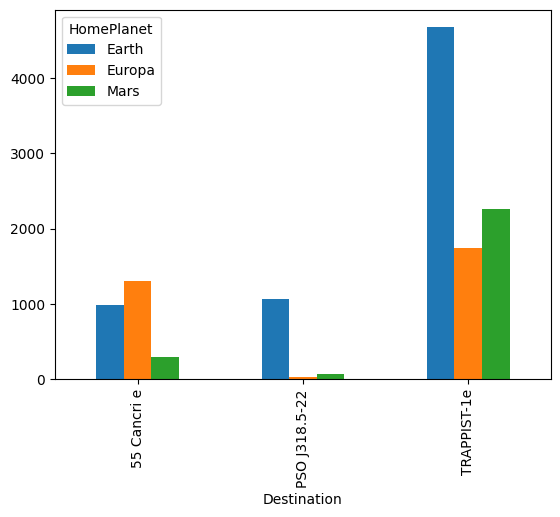

In [14]:
pd.crosstab(all_data['Destination'],all_data['HomePlanet']).plot(kind='bar')

In [16]:
all_data.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'], axis=1, inplace=True)

<AxesSubplot: xlabel='Destination'>

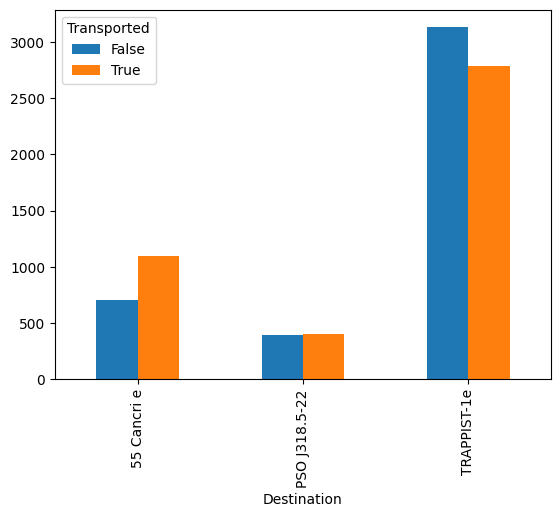

In [27]:
pd.crosstab(train_data['Destination'],train_data['Transported']).plot(kind='bar')

In [21]:
all_data[all_data['Destination']=="PSO J318.5-22"]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,data,Group,CabinDeck,CabinSide,FamilyNum
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,Sandie Hinetthews,True,train,5.0,F,P,1
25,0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,Mael Brantuarez,False,train,20.0,E,S,6
45,0044_03,Earth,True,G/3/P,PSO J318.5-22,21.0,False,Cassa Coopelandez,True,train,44.0,G,P,3
55,0058_01,Earth,True,G/7/S,PSO J318.5-22,36.0,False,Warry Ayalazquez,False,train,58.0,G,S,1
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,0.0,False,Ninaha Leeves,True,train,67.0,G,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,9086_02,Earth,False,F/1759/S,PSO J318.5-22,15.0,False,Leenny Craftstens,NaN,test,9086.0,F,S,2
4198,9096_02,Earth,True,G/1466/S,PSO J318.5-22,24.0,False,Wally Sterson,NaN,test,9096.0,G,S,2
4208,9135_01,Earth,False,G/1487/P,PSO J318.5-22,23.0,False,Troya Quinnedy,NaN,test,9135.0,G,P,1
4235,9200_01,Earth,False,E/591/P,PSO J318.5-22,17.0,False,Marine Englas,NaN,test,9200.0,E,P,1


In [25]:
all_data.to_csv('trial.csv')